<a href="https://colab.research.google.com/github/MarcoVallesG/FisicaComputacional1_/blob/master/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
#Importando las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [98]:
# Creamos un DataFrame compra a partir del archivo de texto de los datos diarios de la estacion en nuestro repositorio:

url = "https://raw.githubusercontent.com/MarcoVallesG/FisicaComputacional1_/master/Actividad1/ClimatologiadiariaTrincheras.txt"
#La URL del archivo de datos que esta guardado en mi repositorio de GH
encabezados=["Fecha","Precip","Evap","TMax","TMin"] 

df_climd = pd.read_csv(url, names=encabezados, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine="python")
#El df read se declara con (url del archivo que usaras, names=titulo columnas, encoding=formato , sep= la separacion de los datos en el archivo,
#header= titulo, skiprows=numero de renglones que quieres que se omitan del principio, skipfooter= numero de renglones que quieres que se omitan del final,
#engine= el motor que lo leera)


#print(df_climd.head(10)) #Para imprimir los primeros diez renglones del df
#print(df_climd.tail(10)) #Para imprimir los ultimos diez renglones del df
#df_climd.shape #Para imprimir la forma del df (Renglones, columnas). En mi caso es de (19793, 5) 
#df_climd.info() #Para imprimir la informacion del df (Cuantas columnas, nombres de columnas, conteo de datos por columnas, tipo de dato)

df_climd0=df_climd.copy() #Creando un df con el cual trabajaremos, el otro lo mantendremos intacto
#df_climd0.head(10) #Para imprimir los primeros diez renglones de la copia del df
#print(df_climd.tail(10)) #Para imprimir los ultimos diez renglones del df
#df_climd0.shape #Para imprimir la forma de la copia del df (Renglones, columnas). En mi caso es de (19793, 5) 
#str_Nulo='Nulo'
#df_datclim1=df_datclim0.replace(to_replace=str_Nulo, value=' ', regex=True) #Este df no tendra ningun "Nulo" en sus casillas.
#df_datclim1.head()

str_Nulo="Nulo"
df_climd1=df_climd0.replace(to_replace=str_Nulo, value=' ', regex=True) #Este df no tendra ningun "Nulo" en sus casillas.
df_climd1.head(10)
#Ya tenemos la copia y no aparece la palabra nulo en ningun lado

#Pasando los datos a númerico
cols_list=["Precip","Evap","TMax","TMin"]
for cols in cols_list:
  df_climd1[cols]=pd.to_numeric(df_climd1[cols], errors="coerce")
#Si no es un numero aparecera como Nan
#df_climd1.info() #Para asegurarnos de que este bien
#Ahora comenzaremos a contar los números que hacen falta
#df_climd1.isnull().sum()#Fecha         0
                         #Precip       19
                         #Evap      10428
                         #TMax        207
                         #TMin        312
#Como vemos hacen falta muchos datos de la evaporacion y en cuanto a los demás siento que son pocos para los años que se tienen

#df_climd1.head(10)
#df_climd1.tail(10) #Para imprimir los primeros 10 y los ultimos 10 datos

#Comenzaremos con el analisis estadistico
#df_climd1.describe()
#No parece haber error en los datos, conteos muy similares exceptuando a la evaporacion, en cuanto a lo demas todo parece correcto sin ningun tipo de fallo
	#Precip	Evap	TMax	TMin
#count	19774.000000	9365.000000	19586.000000	19481.000000
#mean	0.783544	6.119135	31.230415	11.624891
#std	4.445019	3.219043	7.864635	7.379594
#min	0.000000	0.100000	6.500000	-11.000000
#25%	0.000000	3.500000	25.000000	5.500000
#50%	0.000000	5.600000	32.000000	11.000000
#75%	0.000000	8.500000	38.000000	18.000000
#max	151.000000	17.900000	49.500000	30.000000

#Comenzaremos a trabajar con las fechas
#Para ello comenzaremos realizando una copia del documento que tenemos hasta ahora
df_climd2=df_climd1.copy()
#df_climd2["Fecha"].head() #Para imprimir solo la columna de las fechas

df_climd2["Fecha"]=pd.to_datetime(df_climd2["Fecha"], dayfirst=True).copy() #Cambiando los datos de la columna Fechas
df_climd2["Fecha"].head()
#df_climd2.dtypes #Checando el tipo de dato de las columnas.

df_climd2["Año"]=df_climd2["Fecha"].dt.year #Añadiendo una columna 'Año' al df con el año respectivo 
df_climd2["Mes"]=df_climd2["Fecha"].dt.strftime("%b") #Añadiendo una columna 'Mes' al df con el mes respectivo 

#df_climd2.head(10)
#df_climd2.tail(10)

#df_climd2.info() #Para ver que todo este bien
#Creando una copia para trabajar en la actividad 5
df_climdts=df_climd2.copy()

In [99]:
#Ya hemos colocado los nombres de los meses, ahora pasaremos a redefinir el índice del df a que sea la variable "Fecha"
df_climdts = df_climdts.set_index("Fecha")
#df_climdts.info()
#df_climdts.head(10)
#df_climdts.tail(10)

In [100]:
# Seleccionanco conjuntos de 30 años  
df_60 = df_climdts[(df_climdts["Año"] >= 1960) & (df_climdts["Año"] < 1990)]
df_90 = df_climdts[(df_climdts["Año"] >= 1990) & (df_climdts["Año"] < 2016)]
#df_90.head()

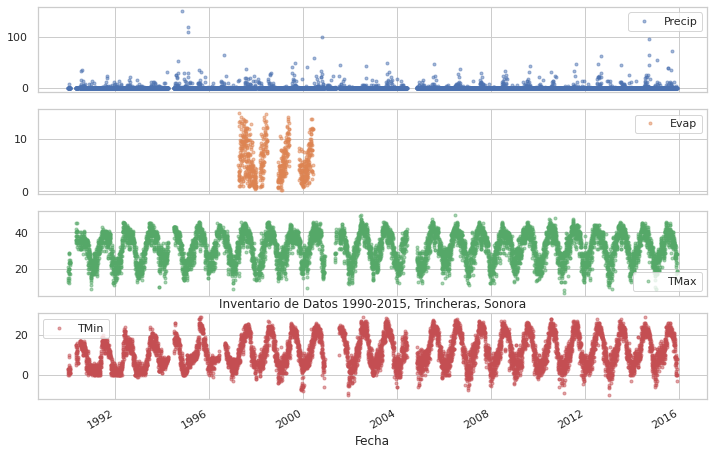

In [101]:
#Revisando la coleccion de los ultimos 35 años
cols_plot = ["Precip", "Evap", "TMax", "TMin"]
ax_ylabels = ["Precip (mm)", "Evap (mm)", "max (°C)", "Tmin (°C)"]
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(12, 8), subplots=True);
plt.title("Inventario de Datos 1990-2015, Trincheras, Sonora");

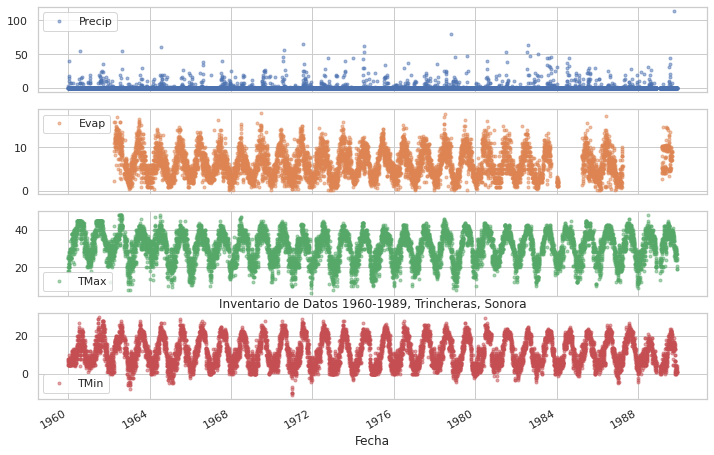

In [102]:
#Revisando la coleccion del periodo de 30 años (1960-1989)
cols_plot = ["Precip", "Evap", "TMax", "TMin"]
ax_ylabels = ["Precip (mm)", "Evap (mm)", "max (°C)", "Tmin (°C)"]
axes = df_60[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(12, 8), subplots=True);
plt.title("Inventario de Datos 1960-1989, Trincheras, Sonora");


Variación en Precipitación promedio 90-60 : 0.03209543358721634


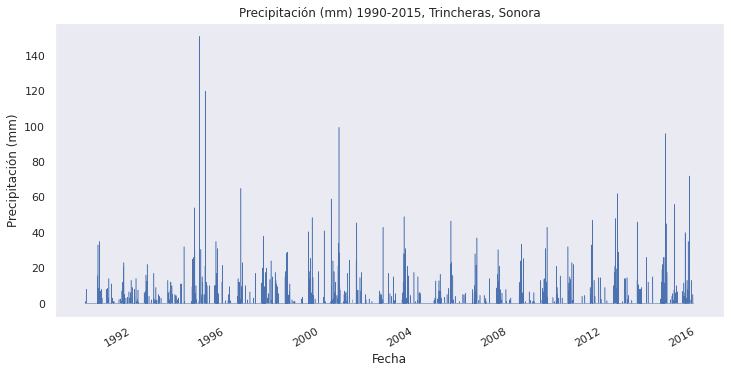

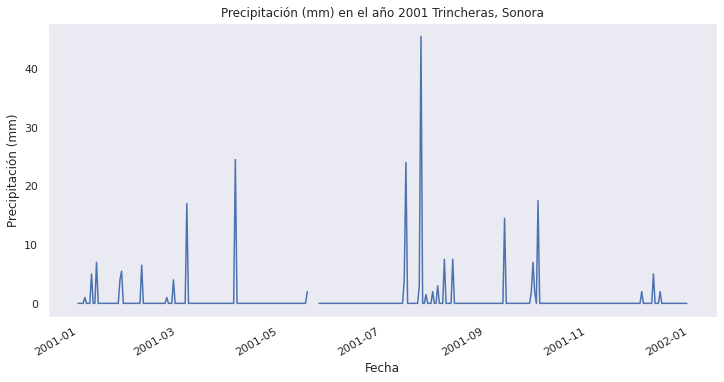

Text(0, 0.5, 'Precipitación (mm)')

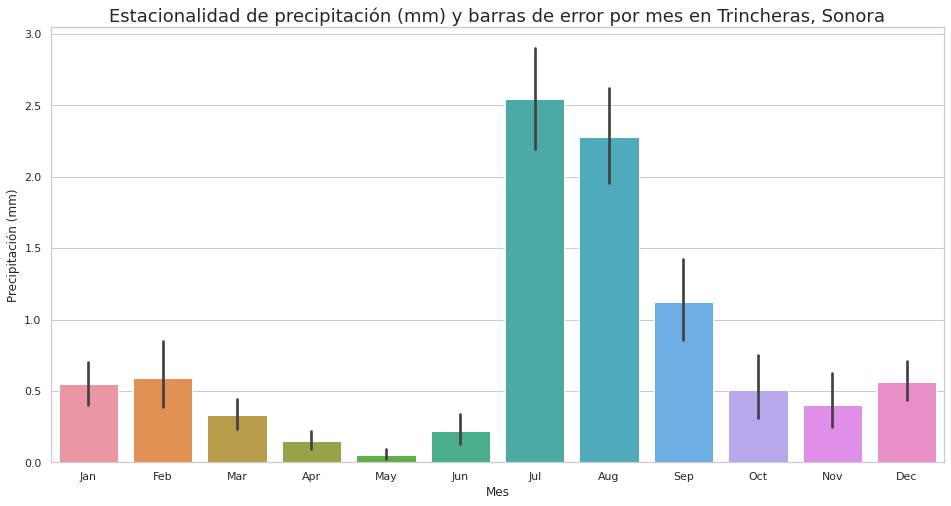

In [115]:
# Graficando la precipitacion del ultimo conjunto de datos
# Tamaño de la figura
sns.set(rc={"figure.figsize":(12, 6)})

# Calculando los promedios de ambos periodos
Precip_P90 = df_90.Precip.mean()
Precip_P60 = df_60.Precip.mean()


# Graficamos la precipitación de la epoca 90 a la actualidad
print("\nVariación en Precipitación promedio 90-60 :", Precip_P90-Precip_P60);
df_90["Precip"].plot(linewidth=0.5);
plt.ylabel("Precipitación (mm)");
plt.title("Precipitación (mm) 1990-2015, Trincheras, Sonora")
plt.grid()
plt.show()

#Ahora graficamos el primer conjunto de datos
#print("\n")
#df_60["Precip"].plot(linewidth=0.5);
#plt.ylabel("Precipitación (mm)")
#plt.title("Precipitación (mm) 1960-1989, Trincheras, Sonora")
#plt.grid()
#plt.show()
# Calculamos diferencias de los promedios de precipitación


#Analizaremos un año en especifico, mi caso sera el 2001 que es año cuando naci
print("\n")
df_90_2001=df_90.loc["2001", "Precip"].plot();
df_90_2001.set_ylabel("Precipitación (mm)");
plt.title("Precipitación (mm) en el año 2001 Trincheras, Sonora")
plt.grid()
plt.show()

#Graficando la estacionalidad de los datos por mes
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
Precipbarmes=sns.barplot(x="Mes", y="Precip", data=df_climdts)
plt.title("Estacionalidad de precipitación (mm) y barras de error por mes en Trincheras, Sonora",fontsize=18)
plt.ylabel("Precipitación (mm)")

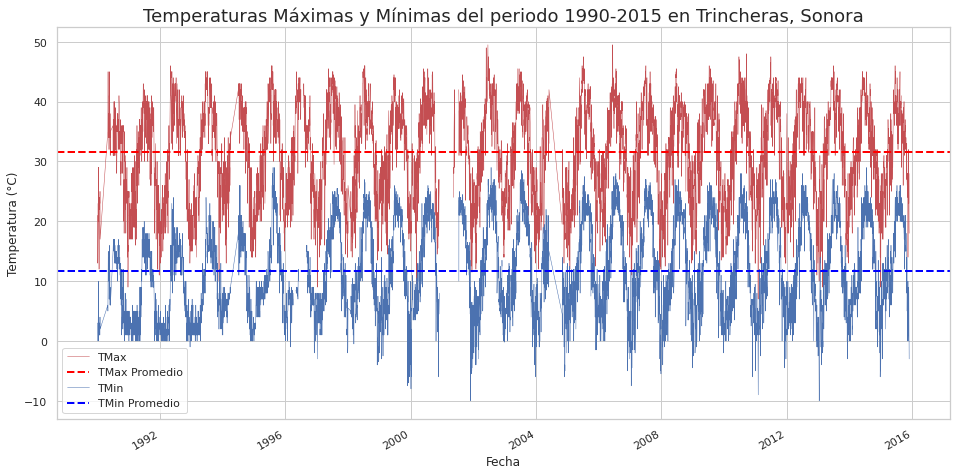

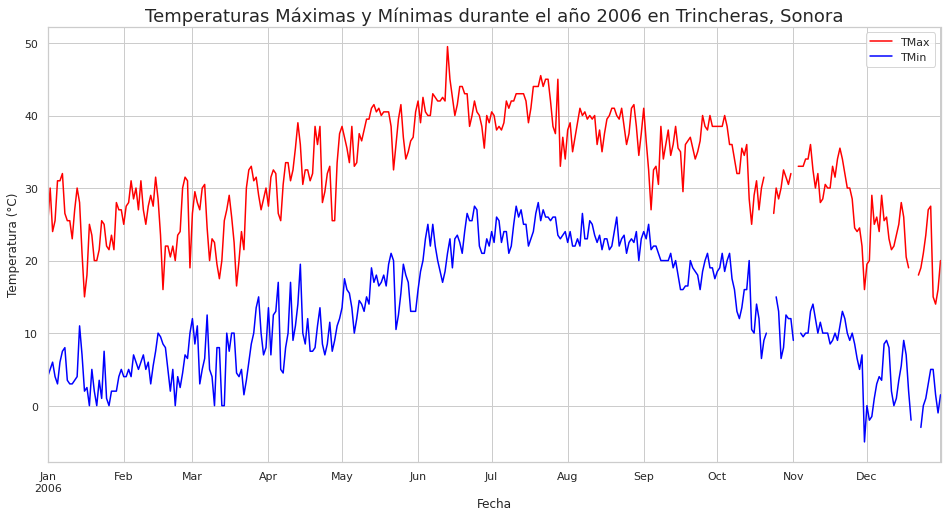

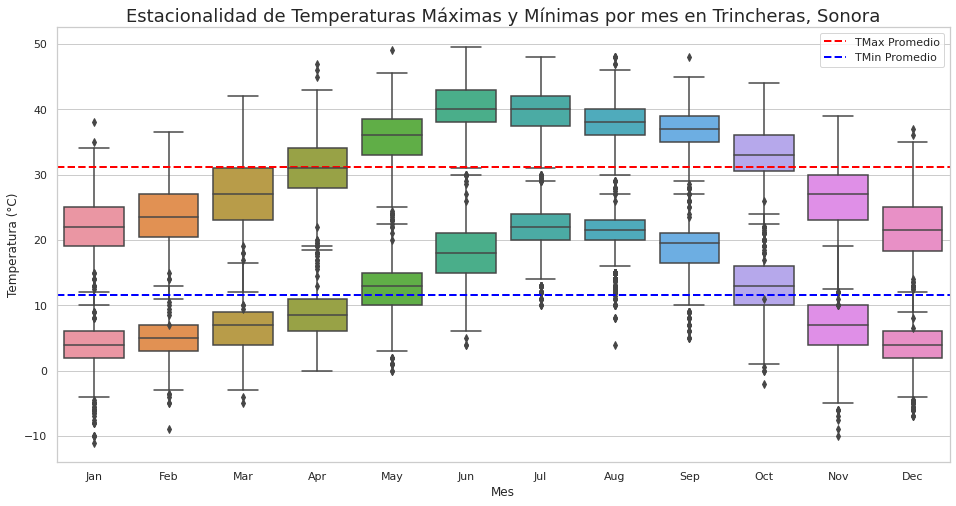

In [128]:
#Actividad2
#Calculando los promedios de las temperaturas en el ultimo conjunto de datos
TMaxP_90=df_90.TMax.mean()
TMinP_90=df_90.TMin.mean()
#print(TMax_90) #Aqui imprimos los promedios para darnos una idea
#print(TMin_90)
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
df_90["TMax"].plot(linewidth=0.5, color="r")
plt.axhline(TMaxP_90, linewidth=2, color="red", linestyle="--", label="TMax Promedio")
df_90["TMin"].plot(linewidth=0.5, color="b")
plt.axhline(TMinP_90, linewidth=2, color="blue", linestyle="--", label="TMin Promedio")
plt.ylabel("Temperatura (°C)")
plt.title("Temperaturas Máximas y Mínimas del periodo 1990-2015 en Trincheras, Sonora",fontsize=18)
plt.legend()
plt.show()


#Analizando ahora un año en especifico, seleccionamos ahora el 2006, se puede ver un pico muy alto en el que casi se llega a 50 grados 
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
TMax_90_2006=df_90.loc["2006", "TMax"].plot(color="red", label="TMax")
TMin_90_2006=df_90.loc["2006", "TMin"].plot(color="blue", label="TMin")
plt.ylabel("Temperatura (°C)")
plt.title("Temperaturas Máximas y Mínimas durante el año 2006 en Trincheras, Sonora", fontsize=18)
plt.legend()
plt.show()

#Graficando la estacionalidad de los datos de temperaturas maximas y minimas
print("\n")
#Calculando los promedios de las temperaturas
TMaxP=df_climdts.TMax.mean()
TMinP=df_climdts.TMin.mean()

#Comenzamos con las parte de las graficas
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
TMaxmesBox=sns.boxplot(x="Mes", y="TMax", data=df_climdts)
plt.axhline(TMaxP, linewidth=2, color="red", linestyle="--", label="TMax Promedio")
TMinmesBox=sns.boxplot(x="Mes", y="TMin", data=df_climdts)
plt.axhline(TMinP, linewidth=2, color="blue", linestyle="--", label="TMin Promedio")
plt.title("Estacionalidad de Temperaturas Máximas y Mínimas por mes en Trincheras, Sonora",fontsize=18)
plt.ylabel("Temperatura (°C)")
plt.legend()

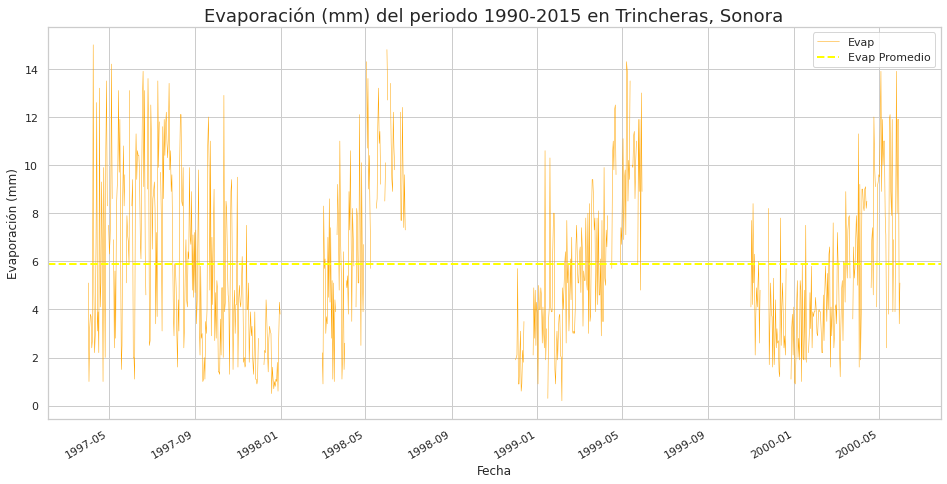

Como podemos observar, hacen falta muchos datos, se observan tan solo 3 años de datos,
seleccionaremos un año donde no se aprecie tanto la falta de datos, el periodo de 01-05-1997:01-05-1998 por ejemplo 




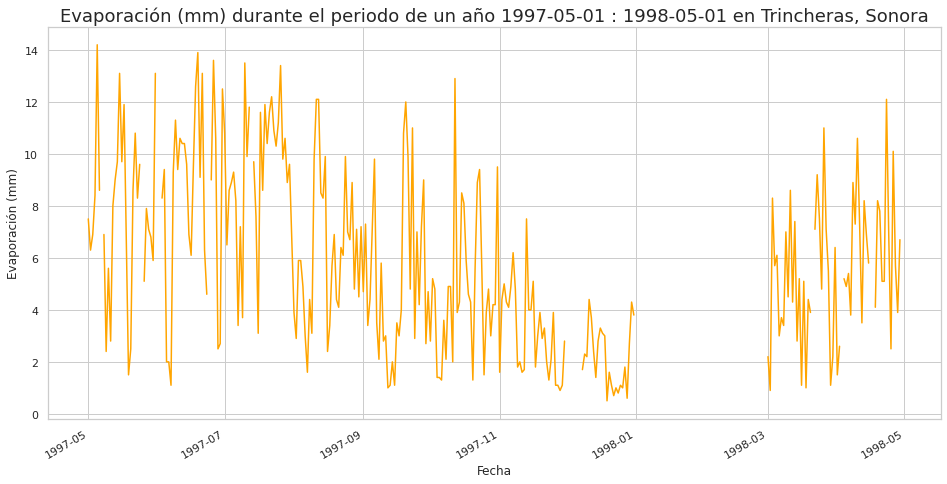

En este caso la falta notable es de un mes aproximadamente




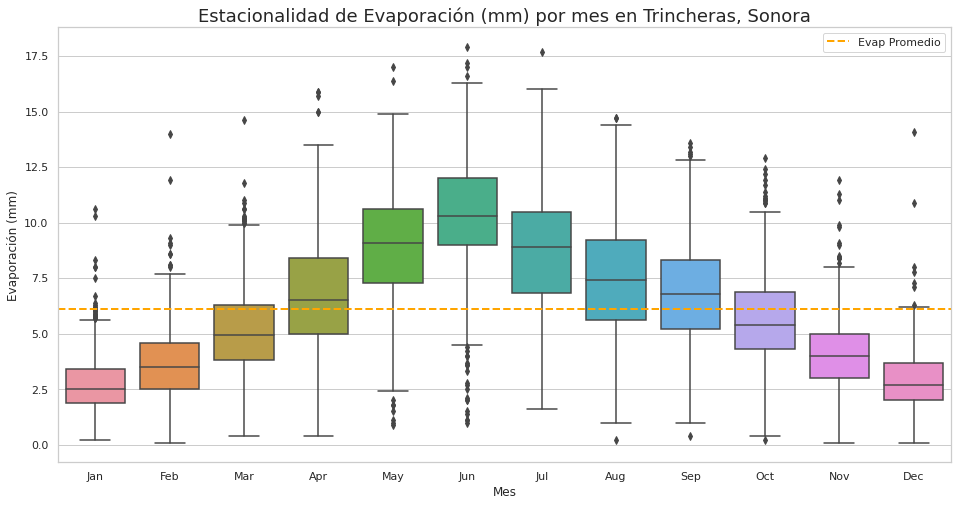

In [134]:
#Actividad3
#Calculando los promedios de las temperaturas en el ultimo conjunto de datos
EvapP_90=df_90.Evap.mean()
#print(EvapP_90) #Aqui imprimos los promedios para darnos una idea
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
df_90["Evap"].plot(linewidth=0.5, color="orange")
plt.axhline(EvapP_90, linewidth=2, color="yellow", linestyle="--", label="Evap Promedio")
plt.ylabel("Evaporación (mm)")
plt.title("Evaporación (mm) del periodo 1990-2015 en Trincheras, Sonora",fontsize=18)
plt.legend()
plt.show()
print("Como podemos observar, hacen falta muchos datos, se observan tan solo 3 años de datos,")
print("seleccionaremos un año donde no se aprecie tanto la falta de datos, el periodo de 01-05-1997:01-05-1998 por ejemplo ")

#Analizando ahora un año en especifico, seleccionamos ahora el 2006, se puede ver un pico muy alto en el que casi se llega a 50 grados 
print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
Evap_90_19978=df_90.loc["1997-05-01":"1998-05-01", "Evap"].plot(color="orange")
plt.ylabel("Evaporación (mm)")
plt.title("Evaporación (mm) durante el periodo de un año 1997-05-01 : 1998-05-01 en Trincheras, Sonora", fontsize=18)

plt.show()
print("En este caso la falta notable es de un mes aproximadamente")


#Graficando la estacionalidad de la evaporacion
print("\n")
#Calculando el promedio
EvapP=df_climdts.Evap.mean()

#Comenzamos con las parte de las graficas
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
EvapmesBox=sns.boxplot(x="Mes", y="Evap", data=df_climdts)
plt.axhline(EvapP, linewidth=2, color="orange", linestyle="--", label="Evap Promedio")
plt.title("Estacionalidad de Evaporación (mm) por mes en Trincheras, Sonora",fontsize=18)
plt.ylabel("Evaporación (mm)")
plt.legend()



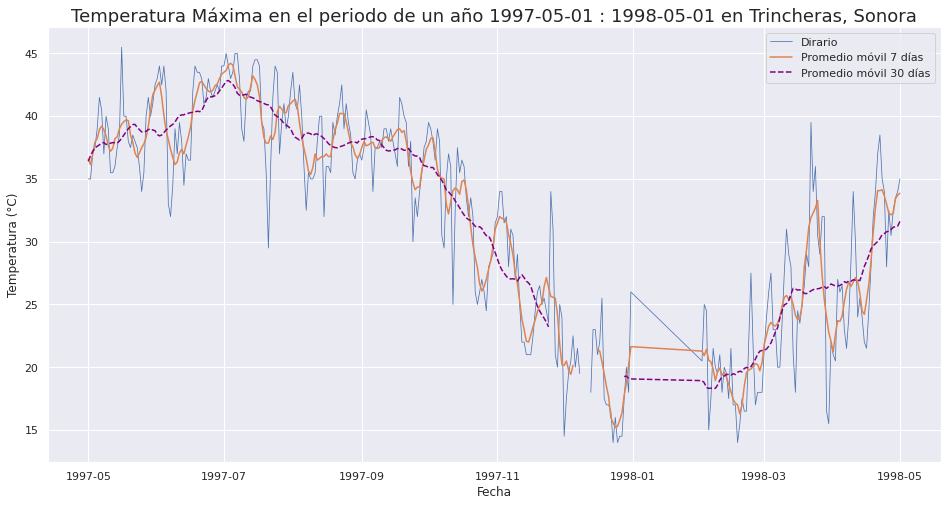

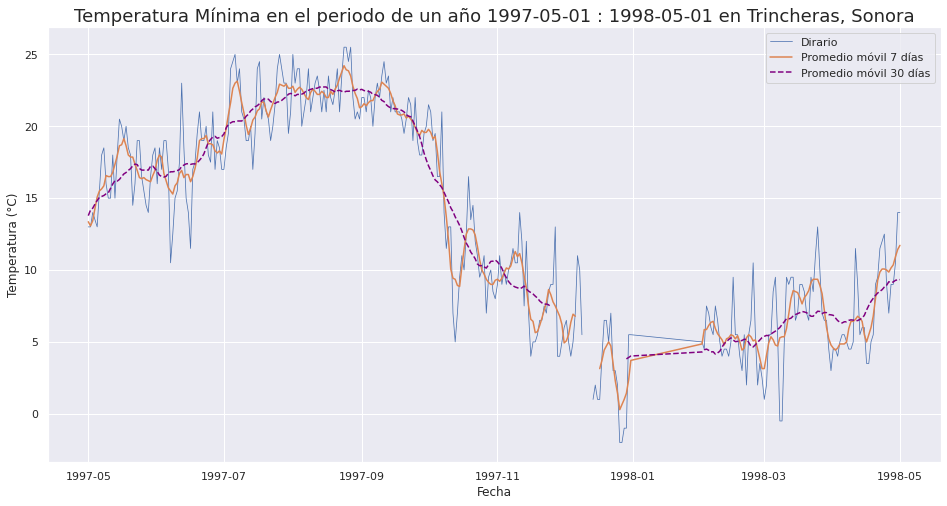

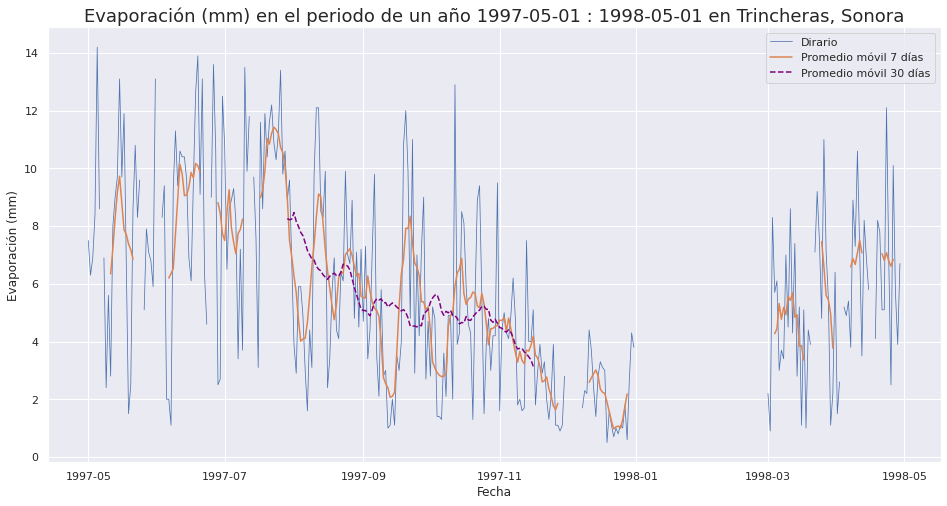

In [173]:
#Actividad4
#Creando los promedio moviles para la Evaporacion, temperatura maxima y minima (7 dias, 30 dias y 365 dias)
data_cols = ["Evap", "TMax", "TMin"]
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()

#Tomaremos el periodo de un año que tomamos para la evaporacion, por la falta de datos que se tiene
#Anotando el inicio y el final del periodo
start,end="1997-05-01" , "1998-05-01"

#Comenzamos con la TMax
sns.set(rc={"figure.figsize":(16,8)})
fig, ax=plt.subplots()
ax.plot(df_90.loc[start:end, "TMax"], linewidth=0.75, label="Dirario")
ax.plot(df_90_7d.loc[start:end, "TMax"],linestyle="-", label="Promedio móvil 7 días")
ax.plot(df_90_30d.loc[start:end, "TMax"], linestyle="--", color="purple", label="Promedio móvil 30 días")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura (°C)")
ax.set_title("Temperatura Máxima en el periodo de un año 1997-05-01 : 1998-05-01 en Trincheras, Sonora",fontsize=18)
plt.legend()

#Seguimos con la TMin.
sns.set(rc={"figure.figsize":(16,8)})
fig, ax=plt.subplots()
ax.plot(df_90.loc[start:end, "TMin"], linewidth=0.75, label="Dirario")
ax.plot(df_90_7d.loc[start:end, "TMin"],linestyle="-", label="Promedio móvil 7 días")
ax.plot(df_90_30d.loc[start:end, "TMin"], linestyle="--", color="purple", label="Promedio móvil 30 días")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura (°C)")
ax.set_title("Temperatura Mínima en el periodo de un año 1997-05-01 : 1998-05-01 en Trincheras, Sonora",fontsize=18)
plt.legend()

#Seguimos ahoa con la Evap
sns.set(rc={"figure.figsize":(16,8)})
fig, ax=plt.subplots()
ax.plot(df_90.loc[start:end, "Evap"], linewidth=0.75, label="Dirario")
ax.plot(df_90_7d.loc[start:end, "Evap"],linestyle="-", label="Promedio móvil 7 días")
ax.plot(df_90_30d.loc[start:end, "Evap"], linestyle="--", color="purple", label="Promedio móvil 30 días")
ax.set_xlabel("Fecha")
ax.set_ylabel("Evaporación (mm)")
ax.set_title("Evaporación (mm) en el periodo de un año 1997-05-01 : 1998-05-01 en Trincheras, Sonora",fontsize=18)
plt.legend()


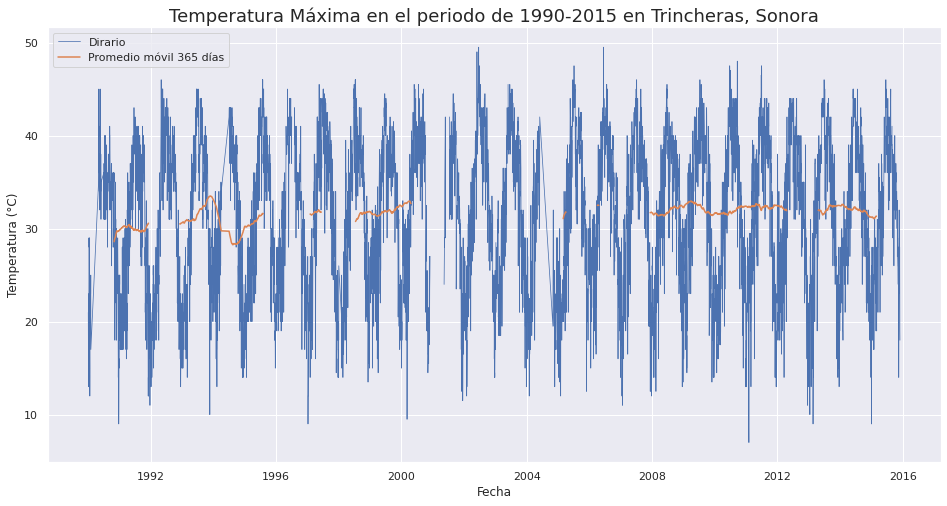

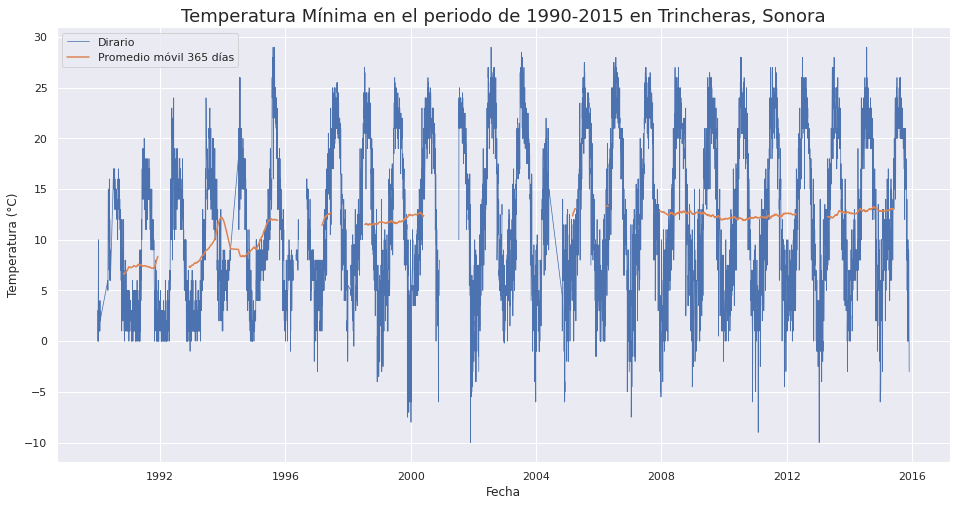

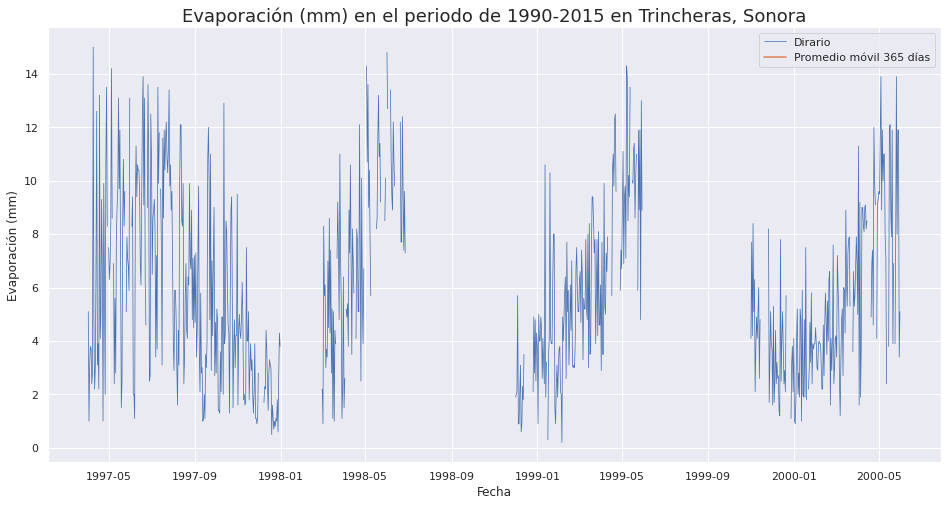

In [178]:
#Seguimos ahora con el periodo de 10 años 
#Seleccionaremos el periodo de 35 años 1990-2015
start,end="1990", "2015"

#Comenzamos con la TMax
sns.set(rc={"figure.figsize":(16,8)})
fig, ax=plt.subplots()
ax.plot(df_90.loc[start:end, "TMax"], linewidth=0.75, label="Dirario")
ax.plot(df_90_365d.loc[start:end, "TMax"],linestyle="-", label="Promedio móvil 365 días")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura (°C)")
ax.set_title("Temperatura Máxima en el periodo de 1990-2015 en Trincheras, Sonora",fontsize=18)
plt.legend()

#Seguimos con la TMin.
sns.set(rc={"figure.figsize":(16,8)})
fig, ax=plt.subplots()
ax.plot(df_90.loc[start:end, "TMin"], linewidth=0.75, label="Dirario")
ax.plot(df_90_365d.loc[start:end, "TMin"],linestyle="-", label="Promedio móvil 365 días")
ax.set_xlabel("Fecha")
ax.set_ylabel("Temperatura (°C)")
ax.set_title("Temperatura Mínima en el periodo de 1990-2015 en Trincheras, Sonora",fontsize=18)
plt.legend()

#Seguimos ahoa con la Evap
sns.set(rc={"figure.figsize":(16,8)})
fig, ax=plt.subplots()
ax.plot(df_90.loc[start:end, "Evap"], linewidth=0.75, label="Dirario")
ax.plot(df_90_365d.loc[start:end, "Evap"],linestyle="-", label="Promedio móvil 365 días")
ax.set_xlabel("Fecha")
ax.set_ylabel("Evaporación (mm)")
ax.set_title("Evaporación (mm) en el periodo de 1990-2015 en Trincheras, Sonora",fontsize=18)
plt.legend()

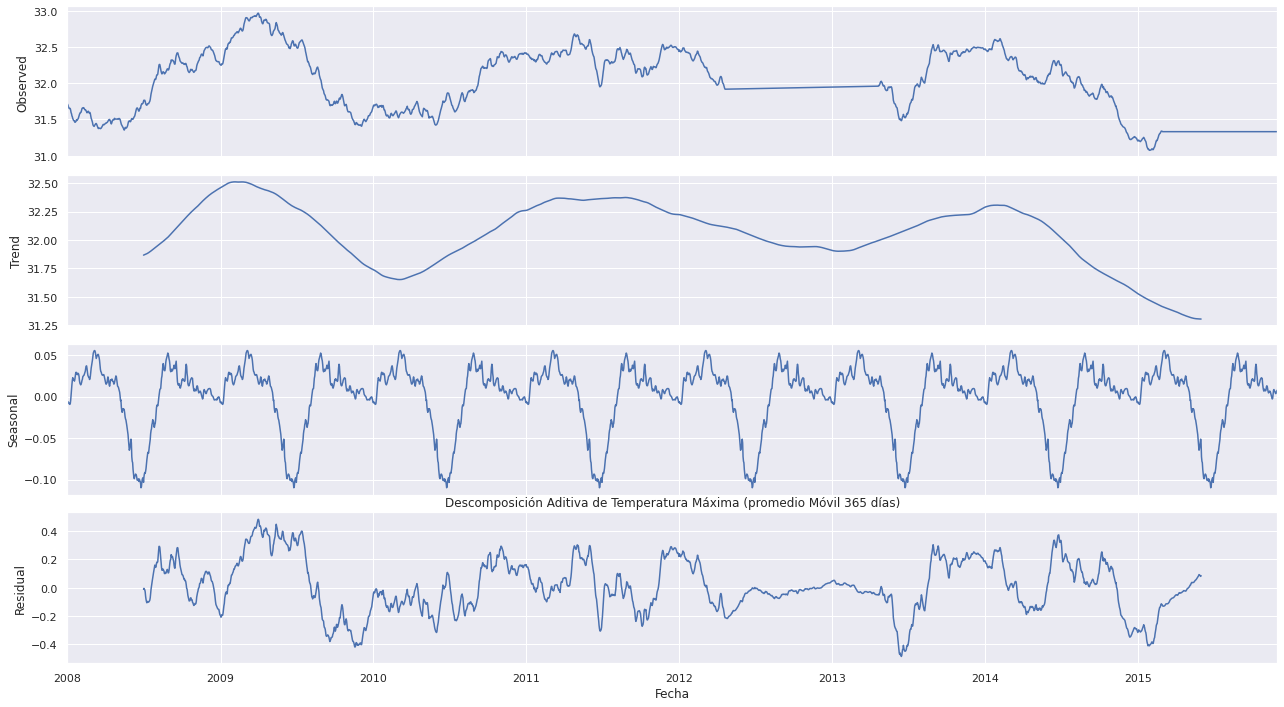

In [201]:
#Actividad5


# Tamaño de la figura
sns.set(rc={"figure.figsize":(18, 10)})
start, end = "2008", "2015"

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo statsmodel para el análisis de series de tiempo(sm.tsa) 

#Comenzamos con la TMax
resTMax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, "TMax"].interpolate(),freq=decompfreq, model="additive")
resTMax.plot()

plt.title("Descomposición Aditiva de Temperatura Máxima (promedio Móvil 365 días)");



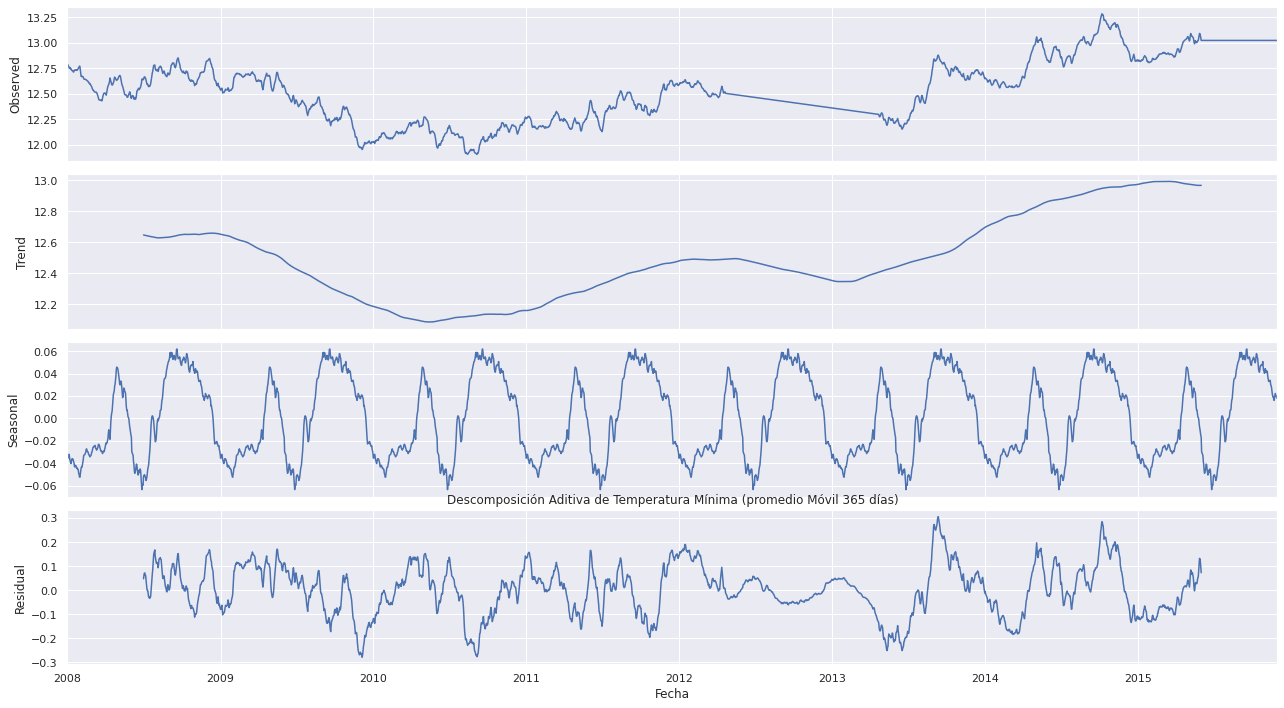

In [202]:
#Ahora la TMin
resTMin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, "TMin"].interpolate(),freq=decompfreq, model="additive")
resTMin.plot()

plt.title("Descomposición Aditiva de Temperatura Mínima (promedio Móvil 365 días)");

In [209]:
#Para el caso de la evaporacion no tenemos datos para manejar, hacen falta muchos datos
print(resTMax.trend.describe())
print(resTMin.trend.describe())#Imprimiendo los datos de lo anterior

count    2527.000000
mean       32.055891
std         0.279953
min        31.302721
25%        31.907476
50%        32.098509
75%        32.273692
max        32.511901
Name: TMax, dtype: float64
count    2527.000000
mean       12.491865
std         0.260441
min        12.084158
25%        12.309304
50%        12.463911
75%        12.649587
max        12.993443
Name: TMin, dtype: float64


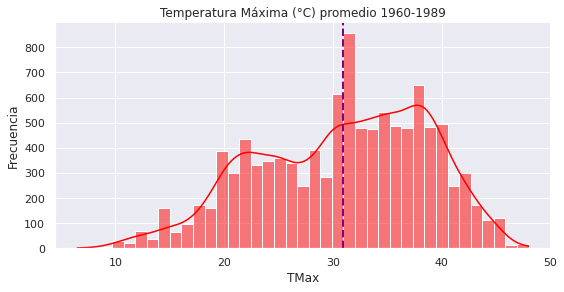

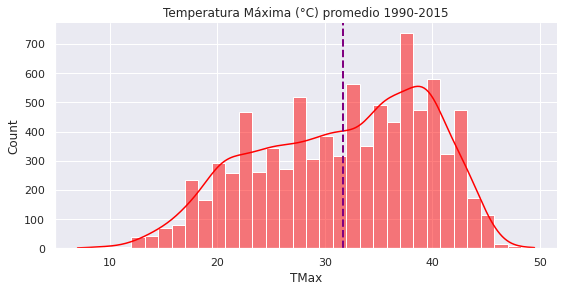

Temperatura Máxima promedio df_60 =  30.890366249420488 °C
Temperatura Máxima promedio df_90 =  31.64711964549483 °C


In [251]:
#Actividad 6
#Comenzamos con la Temperatura Maxima
HistTMax1= sns.displot(df_60.TMax, kde=True, color="red", height=4, aspect=2);
plt.axvline(df_60.TMax.mean(), linestyle="--", linewidth=2, color="purple");

HistTMax2= sns.displot(df_90.TMax, kde=True, color="red", height=4, aspect=2);
plt.axvline(df_90.TMax.mean(), linestyle="--", linewidth=2, color="purple");

HistTMax1.set(title="Temperatura Máxima (°C) promedio 1960-1989");
HistTMax2.set(title="Temperatura Máxima (°C) promedio 1990-2015");
HistTMax1.set_ylabels("Frecuencia");

plt.show();

print("Temperatura Máxima promedio df_60 = ", df_60.TMax.mean(), "°C" )
print("Temperatura Máxima promedio df_90 = ", df_90.TMax.mean(), "°C" )

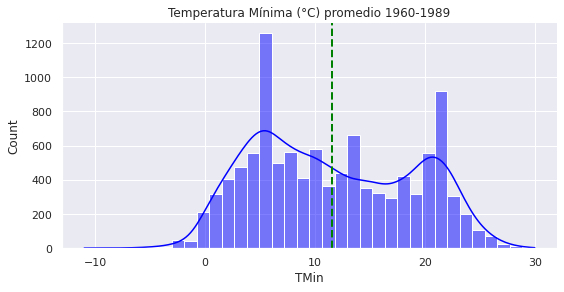

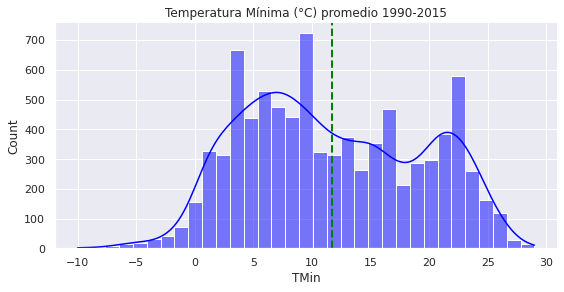

Temperatura Mínima promedio df_60 =  11.577871512005192 °C
Temperatura Mínima promedio df_90 =  11.683229813664596 °C


In [243]:
#Seguimos ahora con la temperatura minima

HistTMin1= sns.displot(df_60.TMin, kde=True, color="blue", height=4, aspect=2);
plt.axvline(df_60.TMin.mean(), linestyle="--", linewidth=2, color="green");

HistTMin2= sns.displot(df_90.TMin, kde=True, color="blue", height=4, aspect=2);
plt.axvline(df_90.TMin.mean(), linestyle="--", linewidth=2, color="green");

HistTMin1.set(title="Temperatura Mínima (°C) promedio 1960-1989");
HistTMin2.set(title="Temperatura Mínima (°C) promedio 1990-2015");
HistTMax1.set_ylabels("Frecuencia");

plt.show();

print("Temperatura Mínima promedio df_60 = ", df_60.TMin.mean(), "°C" )
print("Temperatura Mínima promedio df_90 = ", df_90.TMin.mean(), "°C" )